In [1]:
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Convolution2D, MaxPooling2D, Flatten , Activation, Dropout
from tensorflow.keras.optimizers import SGD
tf.__version__

'2.0.0'

In [2]:
def create_images(cnt):
    images = np.zeros((cnt, 50,50,1))
    labels = np.zeros((cnt,2))
    for c in range(cnt):
        image = np.zeros((50,50,1))
        line_count = 10
        line_length = 10
        line_type = np.random.randint(2, size=1)
        labels[c][line_type] = 1 #One-Hot-Coding
        for _ in range(line_count):
            line = np.zeros((line_length,2))
            line[0] = np.random.randint(50, size=2)
            index = 1
            bordered = False
            while index < line_length:
                point = np.copy(line[index - 1])
                if point[line_type] + 1 < 50 and not bordered:
                    point[line_type] += 1
                    line[index] = point
                elif point[line_type] + 1 >= 50 or bordered:
                    bordered = True
                    if line[0][line_type] < point[line_type]:
                        point = np.copy(line[0])
                    point[line_type] -= 1     
                    line[index] = point
                index += 1
            #print(line)
            for point in line:
                p = point.astype(int)
                image[p[0]][p[1]] = 1
        images[c] = image.astype(int)
    return images, labels

In [3]:
train_data, train_label = create_images(1000)
val_data, val_label = create_images(1000)

[0. 1.]


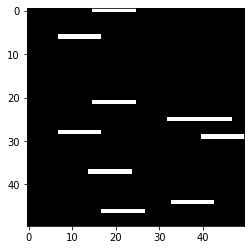

[1. 0.]


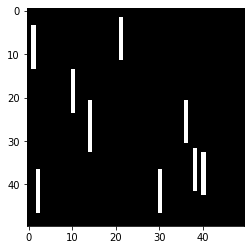

In [4]:
plt.imshow(np.reshape(train_data[0],(50,50)), 'gray')
print(train_label[0])
plt.show()
plt.imshow(np.reshape(val_data[0],(50,50)), 'gray')
print(val_label[0])
plt.show()

b) Build the simplest possible CNN
Make a CNN with one convolution, haveing two outputs (one for horizontal, one for vertical). Train the CNN on the data from a).

Plot the learning curves: (epochs vs training loss and validation loss) and epochs vs accuracy.You should get an accuracy of approximatly 1.

In [52]:
model = Sequential()
# model.add(keras.layers.Reshape(target_shape=(50, 50, 1)))
model.add(Convolution2D(1, kernel_size=(5,5),activation='relu',input_shape=(50,50, 1)))
model.add(Flatten())
model.add(Dense(2, activation='softmax'))

In [53]:
model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 46, 46, 1)         26        
_________________________________________________________________
flatten_3 (Flatten)          (None, 2116)              0         
_________________________________________________________________
dense_11 (Dense)             (None, 2)                 4234      
Total params: 4,260
Trainable params: 4,260
Non-trainable params: 0
_________________________________________________________________


In [54]:
eta = 0.03                  # learning rate
sgd = SGD(lr=eta)

model.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])

In [55]:
history = model.fit(train_data, train_label,
          epochs=10, 
          batch_size=16,
          validation_data=(val_data, val_label))

Train on 1000 samples, validate on 1000 samples
Epoch 1/10
1000/1000 [==============================] - 2s 2ms/sample - loss: 0.6149 - accuracy: 0.6260 - val_loss: 0.5036 - val_accuracy: 0.6620
Epoch 2/10
1000/1000 [==============================] - 1s 1ms/sample - loss: 0.3815 - accuracy: 0.9270 - val_loss: 0.3191 - val_accuracy: 0.9830
Epoch 3/10
1000/1000 [==============================] - 1s 1ms/sample - loss: 0.2544 - accuracy: 0.9980 - val_loss: 0.2313 - val_accuracy: 0.9980
Epoch 4/10
1000/1000 [==============================] - 2s 2ms/sample - loss: 0.1833 - accuracy: 1.0000 - val_loss: 0.1765 - val_accuracy: 1.0000
Epoch 5/10
1000/1000 [==============================] - 3s 3ms/sample - loss: 0.1388 - accuracy: 1.0000 - val_loss: 0.1403 - val_accuracy: 1.0000
Epoch 6/10
1000/1000 [==============================] - 3s 3ms/sample - loss: 0.1088 - accuracy: 1.0000 - val_loss: 0.1133 - val_accuracy: 1.0000
Epoch 7/10
1000/1000 [==============================] - 3s 3ms/sample - loss

In [9]:
#history.history

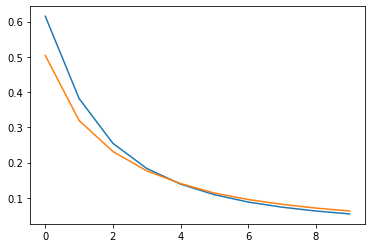

In [56]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

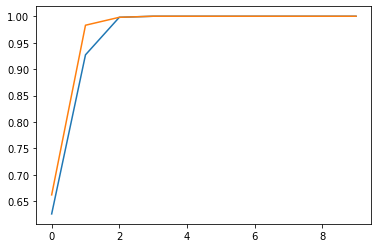

In [57]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

c) 
Visualize the learned kernel, you might want to use model.get_weights(). Does the learned kernel makes sense?

In [58]:
model.get_weights()[0].shape, model.get_weights()[1].shape, model.get_weights()[2].shape, model.get_weights()[3].shape

((5, 5, 1, 1), (1,), (2116, 2), (2,))

In [59]:
print(np.reshape(model.get_weights()[0], (5,5)),'\n\n', 
      model.get_weights()[1],'\n\n', 
      model.get_weights()[2],'\n\n', 
      model.get_weights()[3])

[[ 0.11532079  0.28512397  0.26657704  0.14951977  0.1799865 ]
 [ 0.18075433  0.40625805  0.05120017  0.06028444 -0.06968265]
 [ 0.46557972  0.17431003  0.26565963  0.5881333   0.55007166]
 [-0.44495812 -0.46072564 -0.2875233  -0.45872182 -0.25427967]
 [-0.23892695 -0.4341247  -0.06230799 -0.30960372 -0.38872138]] 

 [-0.31321573] 

 [[-0.03269471 -0.01123811]
 [-0.03762279 -0.01463994]
 [ 0.01331602  0.04440452]
 ...
 [-0.04650426 -0.0143363 ]
 [-0.03173876 -0.02023889]
 [ 0.04293345 -0.00351001]] 

 [ 1.3966408 -1.3966408]
